In [100]:
# Task-1 STUDENT PASS/FAIL Prediction
# The objective of this project is to Predict whether a student will pass or fail based on their study hours and attendance.
# For this project we use libraries like Numpy, pandas, matplotlib, seaborn
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


# This section is to suppresses warnings generated by the code:
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [101]:
# Data Selection
# We will use Student dataset. This dataset is taken from (https://www.kaggle.com/datasets/souradippal/student-performance-prediction/data) from a provided source file and is available on kaggle.The dataset contains columns such as 'Student ID', 'Study Hours per Week', 'Attendance Rate', 'Previous Grades', 'Participation in Extracurricular Activities','Parent Education Level', 'Passed'.
# Path to file
data = pd.read_csv("C:/Users/ganga/Downloads/student_performance_prediction.csv")

In [102]:
# Display first few rows
print("The first five rows of the dataset are")
print(data.head())

The first five rows of the dataset are
  Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
0     S00001                  12.5              NaN             75.0   
1     S00002                   9.3             95.3             60.6   
2     S00003                  13.2              NaN             64.0   
3     S00004                  17.6             76.8             62.4   
4     S00005                   8.8             89.3             72.7   

  Participation in Extracurricular Activities Parent Education Level Passed  
0                                         Yes                 Master    Yes  
1                                          No            High School     No  
2                                          No              Associate     No  
3                                         Yes               Bachelor     No  
4                                          No                 Master     No  


In [103]:
colums_to_consider = ['Study Hours per Week','Attendance Rate','Passed']
df = data[colums_to_consider]
print(df)

       Study Hours per Week  Attendance Rate Passed
0                      12.5              NaN    Yes
1                       9.3             95.3     No
2                      13.2              NaN     No
3                      17.6             76.8     No
4                       8.8             89.3     No
...                     ...              ...    ...
39995                  15.6             93.8     No
39996                  11.3             66.4    Yes
39997                  13.1             65.6     No
39998                  14.1             74.9     No
39999                  11.8             55.1    Yes

[40000 rows x 3 columns]


In [104]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Study Hours per Week  38005 non-null  float64
 1   Attendance Rate       38008 non-null  float64
 2   Passed                38000 non-null  object 
dtypes: float64(2), object(1)
memory usage: 937.6+ KB


In [105]:
# Check for missing values
print("\n Missing values are:")
df.isnull().sum()


 Missing values are:


Study Hours per Week    1995
Attendance Rate         1992
Passed                  2000
dtype: int64

In [106]:
# Converting the column 'passed' yes to 1, andd No to 0 by using map function
df['Passed'] = df['Passed'].map({'Yes':1, 'No':0 }).fillna(0).astype(int)
print(df['Passed'])

0        1
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    0
39998    0
39999    1
Name: Passed, Length: 40000, dtype: int32


In [107]:
# Droping null values
df.dropna()

,Study Hours per Week,Attendance Rate,Passed
1,9.3,95.3,0
3,17.6,76.8,0
4,8.8,89.3,0
5,8.8,73.8,1
6,17.9,38.6,1
...,...,...,...
39995,15.6,93.8,0
39996,11.3,66.4,1
39997,13.1,65.6,0
39998,14.1,74.9,0


In [108]:
# Filling missing values
df.fillna(df['Attendance Rate'].mean(), inplace = True)
df.fillna(df['Study Hours per Week'].mean(), inplace=True)
df.fillna(df['Passed'].mean(), inplace=True)

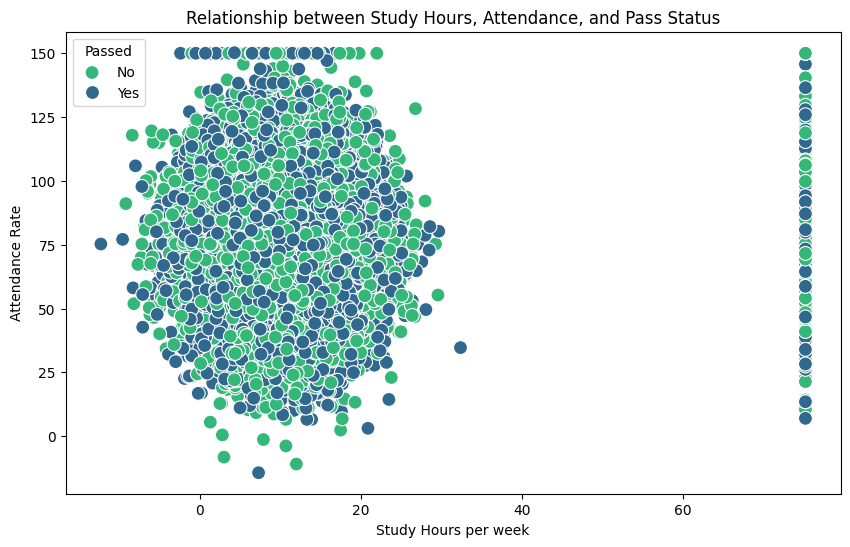

In [109]:

# Create scatter plot to vizualize the realtionship between studyhours per week,Attendance and passed columns.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Study Hours per Week', y='Attendance Rate', hue='Passed', palette='viridis', s=100)

# Add title and labels
plt.title('Relationship between Study Hours, Attendance, and Pass Status')
plt.xlabel('Study Hours per week')
plt.ylabel('Attendance Rate')
plt.legend(title='Passed', labels=['No', 'Yes'])

# Show plot
plt.show()

In [110]:
# Model Training
# Define feature x and target variable y
x = df[['Study Hours per Week','Attendance Rate']]
y = df['Passed']  #Binary target(0=fail and 1 = pass)

In [111]:
# Split the data into training(80%) and testing(20%) sets
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size=0.2, random_state=42) 
print(f"Training samples: {x_train.shape[0]}, Testing samples: {x_test.shape[0]}")

Training samples: 32000, Testing samples: 8000


In [112]:
# Initialize and Train model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [113]:
# Make predictions
y_predict = model.predict(x_test)

In [114]:
# Print Accuracy
accuracy = accuracy_score(y_test,y_predict)
print(f"Model Accuracy:{accuracy: .2f}")

Model Accuracy: 0.53


In [115]:
# Confusion Matrix
confusionmatrix = confusion_matrix(y_test,y_predict)
print("\n Confusion Matrix:")
print(confusionmatrix)


 Confusion Matrix:
[[4212    0]
 [3788    0]]


In [116]:
# Classification report
print("\n Classification Report:")
print(classification_report(y_test,y_predict))


 Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      4212
           1       0.00      0.00      0.00      3788

    accuracy                           0.53      8000
   macro avg       0.26      0.50      0.34      8000
weighted avg       0.28      0.53      0.36      8000



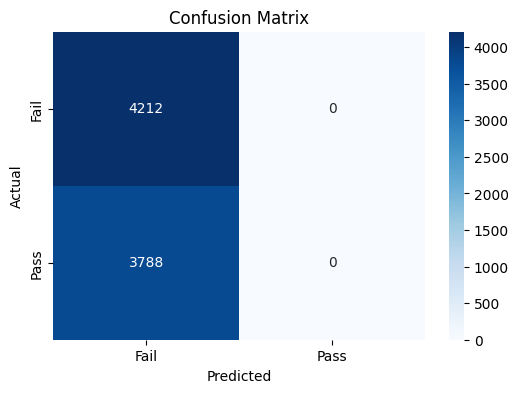

In [117]:
# Ploting  confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusionmatrix,annot=True,fmt="d",cmap='Blues',xticklabels=["Fail","Pass"],yticklabels=["Fail","Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [118]:
# Task-2  Sentiment Analysis with Natural Language Processing 
# The Objective of this task is to Analyze customer reviews to classify sentiments as positive or negative.
#Importing required libraries
import nltk   # Installed nltk library 
nltk.download('stopwords')

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
# Data selection 
# We will use Customer dataset containing customer reviews to  classify sentiments. The dataset is taken from (https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset/data) from a provided source file and is available on kaggle. the dataset contains columns like 
Data = pd.read_csv("C:/Users/ganga/Downloads/test.csv", encoding='latin1')

In [120]:
# Display the first few five of the dataset
Data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [121]:
# Display basic Information of the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [122]:
# Checking for null values
print(Data.isnull().sum())

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64


In [123]:
# Drop the null values
Data.dropna()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554.0,120340.0,55.0
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644.0,1266700.0,19.0
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589.0,910770.0,226.0
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816.0,120410.0,214.0


In [128]:
# Functions to clean and process text
def preprocess_text(text):
    text = re.sub(r'\w', ' ', text)    # Remove special characters
    text = text.lower()   # Covert to lower type
    text = text.split()   # Tokenization
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(text)

# Applying preprocessing 
df['cleaned_review']= Data['text'].apply(preprocess_text)
print("\nPreprocessed Data")
print(df[['text','cleaned_review']].head())

TypeError: expected string or bytes-like object, got 'float'